# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [67]:
import warnings

# Filter out the specific UserWarning related to missing glyphs in IPython
warnings.filterwarnings("ignore", category=UserWarning, module="IPython")

In [68]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [ ]:
No_rows,No_cols=df.shape
print("Number of rows:",No_rows)
print("Number of columns:",No_cols)

Number of rows: 1898
Number of columns: 9



#### Observations:
The number of rows in the DataFrame is 1898 and the number of columns in it are 9.





### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
#####The DataFrame has 9 columns and the datatype of each column is listed below:
#####order_id - integer(all negative,positive numbers including 0)
#####customer_id - integer
#####restaurent_name - object (means string,a combination of various data types)
#####cuisine_type - object
#####cost_of_the_order - float(numbers with decimal point)
#####day_of_the_week - object
#####rating - object
#####food_preparation_time - integer
#####delivery_time - integer
Thus it can be concluded that the DataFrame has 4 columns of integer data type,4 columns of object data type and 1 column of float data type.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
#Lets check if there are any missing values in the data
df.isnull().sum()


order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
The data is good.There are no missing values in the dataset as df.isnull().sum() returned 0 for all columns.Hence,it shows that the DataFrame is complete and no 'handling the missing value' operations have to be performed.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
#Using describe() extract the required statistical values.Assign the result of this to a variable and obtain the required values by specifying it in []

food_prep_summary=df['food_preparation_time'].describe()
min=food_prep_summary['min']

#The average of values is actually the mean ,so calculate the mean
avg=food_prep_summary['mean']

max=food_prep_summary['max']

#Now lets print the values
print("Minimum time taken for food to be prepared: ",min,"mins")
print("Average time taken for food to be prepared: ",avg,"mins")
print("Maximum time taken for food to be prepared: ",max,"mins")


Minimum time taken for food to be prepared:  20.0 mins
Average time taken for food to be prepared:  27.371970495258168 mins
Maximum time taken for food to be prepared:  35.0 mins


### Observations:
####After analyzing the DataFrameThe we can understand that:
####Minimum time taken for food to be prepared once an order is placed 20.0mins mins,the average time is 27.4mins(roundoff) and the maximum time taken is 35.0mins.


### **Question 5:** How many orders are not rated?

In [ ]:

#To find how many orders have not received the rating as specified as 'Not given' in DataFrame including null values
null_val=df['rating'].isnull().sum()
print("Orders with null values for rating:",null_val)
unrated_orders = df[df['rating'] == 'Not given'].shape[0]
print("Orders that are not rated:",unrated_orders)



Orders with null values for rating: 0
Orders that are not rated: 736



#### Observations:
In the DataFrame 736 orders are not given rating.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

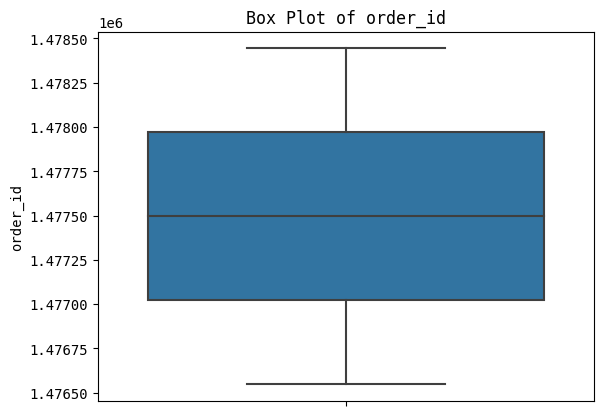

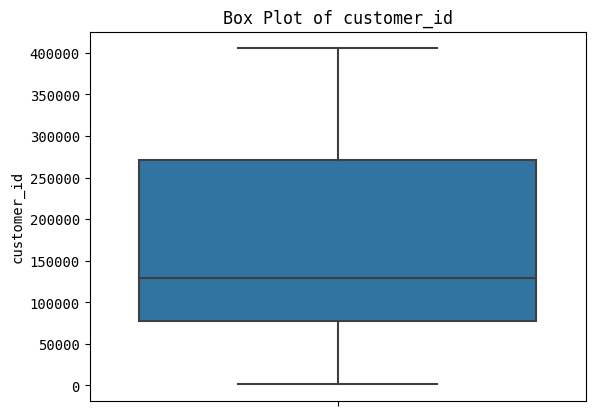

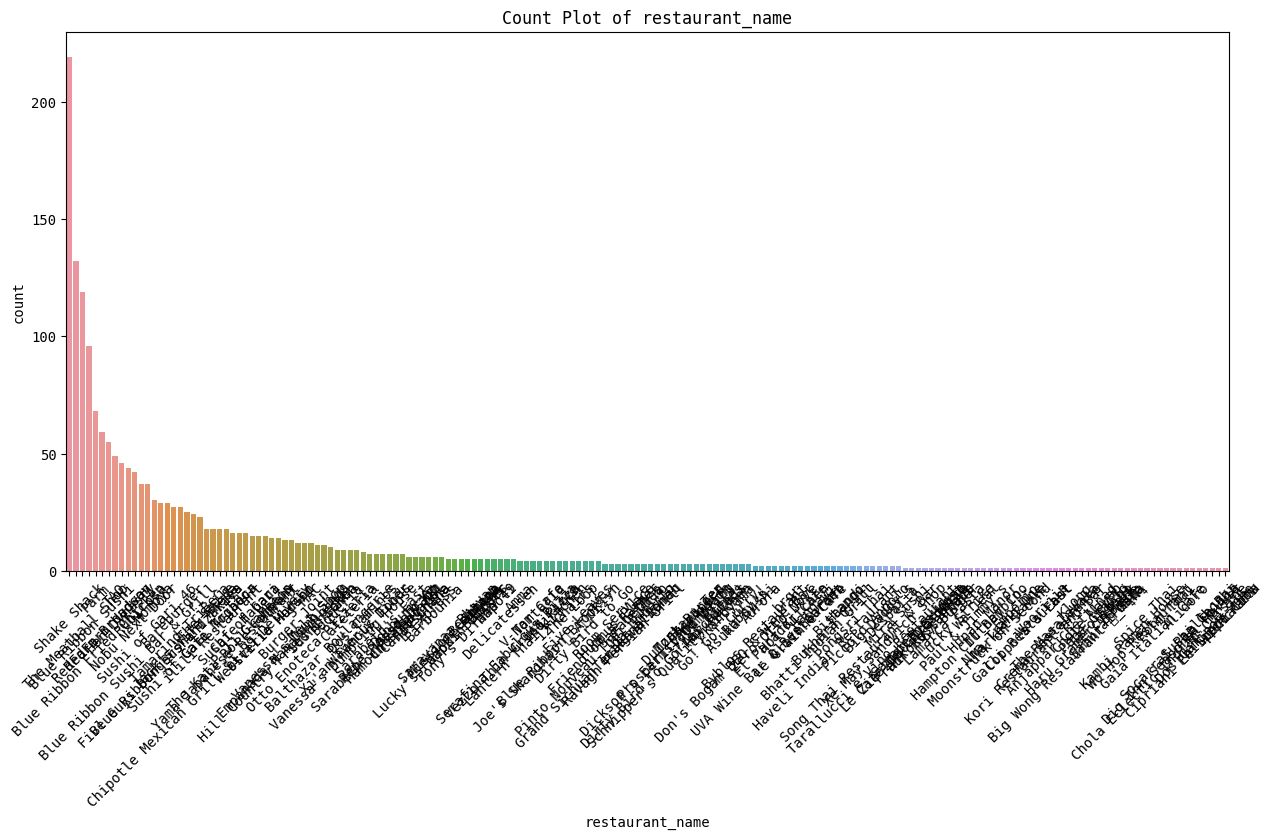

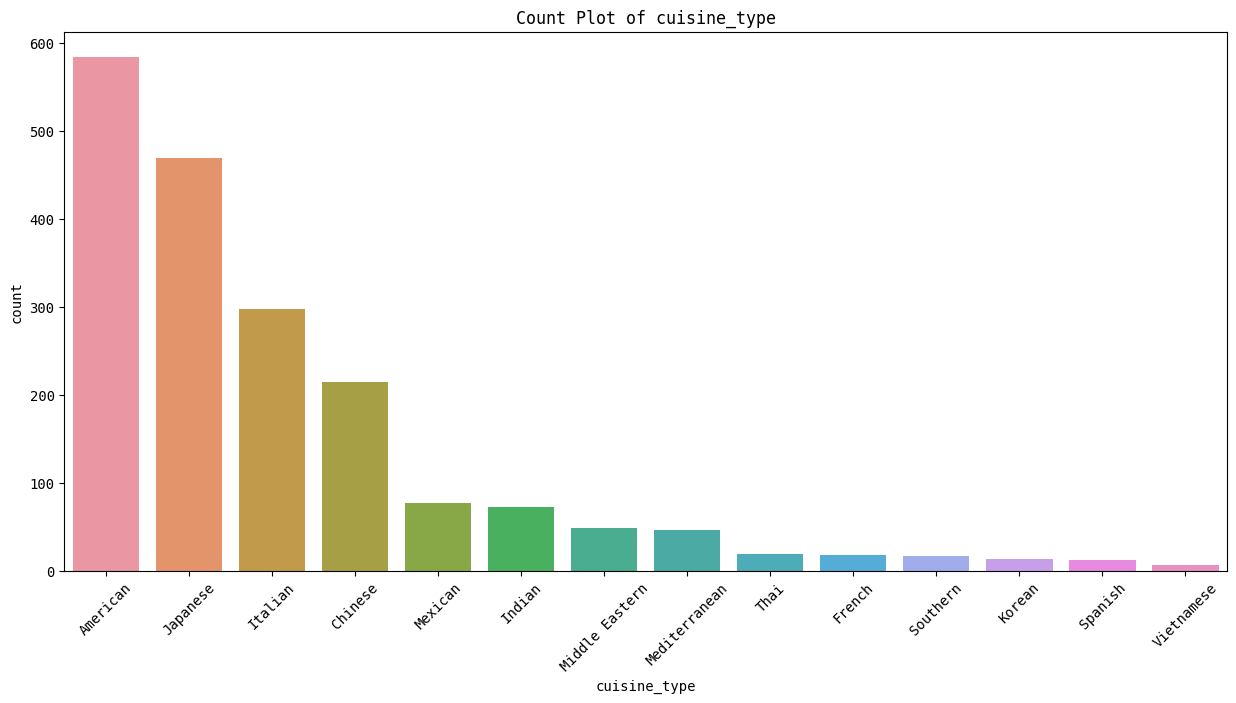

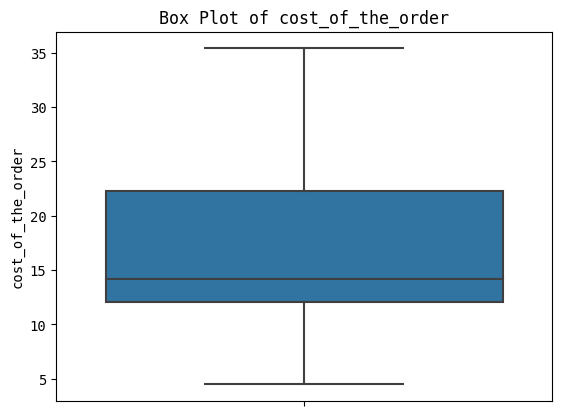

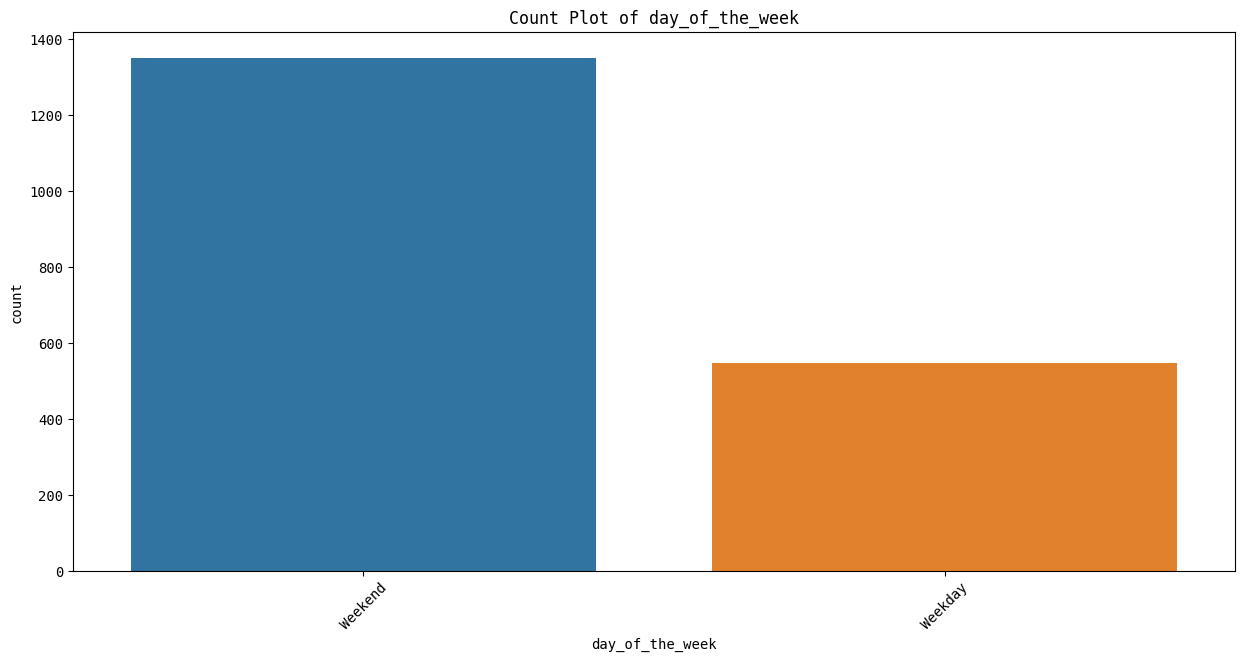

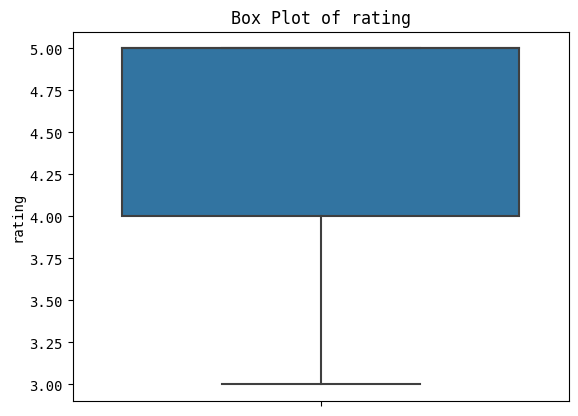

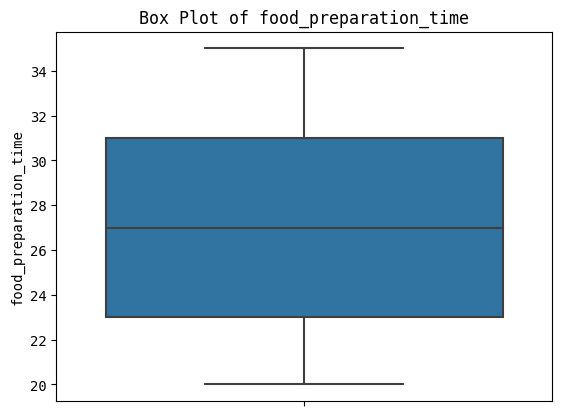

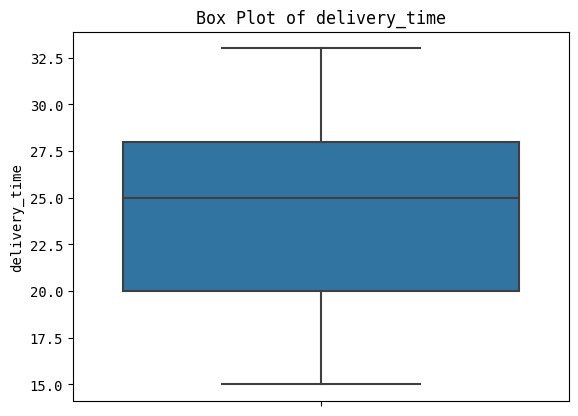

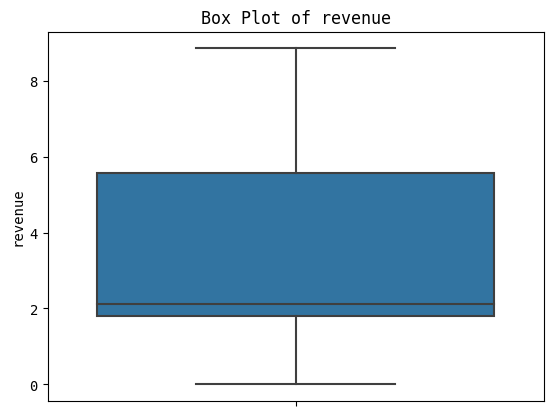

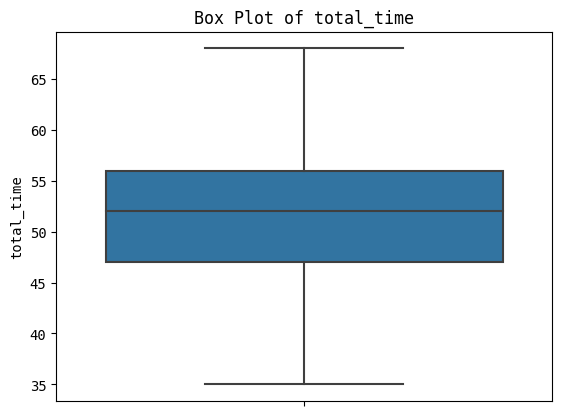

In [72]:

for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:#create boxplot for numerical data
        sns.boxplot(data=df, y=column)  # Create a box plot
        plt.rcParams["font.family"] = "monospace"
        plt.title(f'Box Plot of {column}')
        plt.show()


    elif df[column].dtype == 'object':  #Create countplot for categorical data
            plt.figure(figsize=(15, 7))
            sns.countplot(data=df, x=column, order=df[column].value_counts().index)
            plt.xticks(rotation=45)  # Rotate x-axis labels for readability
            plt.title(f'Count Plot of {column}')
            plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
restaurant_orders=df['restaurant_name'].value_counts()
top_restaurants=restaurant_orders.head(5)
print("Top 5 restaurants are:")
print(top_restaurants)

Top 5 restaurants are:
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64




### Observations:
Find the most orders for a restaurant using value_counts() function and print the top 5 restaurant using head(5) function with parameter 5.
As per the observations the top 5 restaurents are in order.
#####Shake Shack
#####The Meatball Shop
#####Blue Ribbon Sushi
#####Blue Ribbon Fried Chicken
#####Parm


### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
weekend_orders=df[df['day_of_the_week'].isin(['Weekend'])]
cuisine_counts=weekend_orders['cuisine_type'].value_counts()
popular_cuisine=cuisine_counts.idxmax()
print("The most popular cuisine on weekends:",popular_cuisine)



The most popular cuisine on weekends: American



### Observations:
  By filtering and creating a new DataFrame , with weekend orders only ,named Weekend_orders and taking the value counts of the DF for cuisine type and using idxmax to find the most popular cusine it is observed that
#####The most popular cuisine type on weekend is American.


### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
#Filter the data and create DataFrame with orders that costs greater than $20
orders=df[df['cost_of_the_order'] > 20]
#Find the percentage using mathematical operations.
percentage_expensive_orders = (len(orders) / len(df)) * 100
print(f"The percentage of orders costing more than $20 is:{percentage_expensive_orders:.2f}%")



The percentage of orders costing more than $20 is:29.24%




#### Observations:
The percentage of orders costing more than 20 dollars is 29.241%.This means that nearly one-third of the orders are considered expensive.


### **Question 10**: What is the mean order delivery time?

In [ ]:
mean=df['delivery_time'].mean()
print(f"Mean order delivery time:{mean:.2f}")

Mean order delivery time:24.16


#### Observations:
Mean order delivary time is 24.16.This shows slightly longer time is taken for the order being delivered.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [ ]:
#Create DataFrame having only 2 columns customer id and order count.

customer_orders = df['customer_id'].value_counts().reset_index()
customer_orders.columns = ['customer_id', 'order_count']

# Sort the customers by order count in descending order
customer_orders = customer_orders.sort_values(by='order_count', ascending=True)

# Select the top 3 most frequent customers
top_3_customers = customer_orders.head(3)

print("Top 3 most frequent customers and their order counts:")
print(top_3_customers)

Top 3 most frequent customers and their order counts:
     customer_id  order_count
599       387102            1
803        52360            1
802       101084            1


#### Observations:
Top 3 customers who have placed the most orders are:
#####Customer_id:52832 with 13 orders
#####Customer_id:47440 with 10 orders
#####Customer_id:83287 with 9 orders
This shows that that often place order with the company,means they like the facilities and necessity provided by the company.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

<Figure size 1500x800 with 0 Axes>

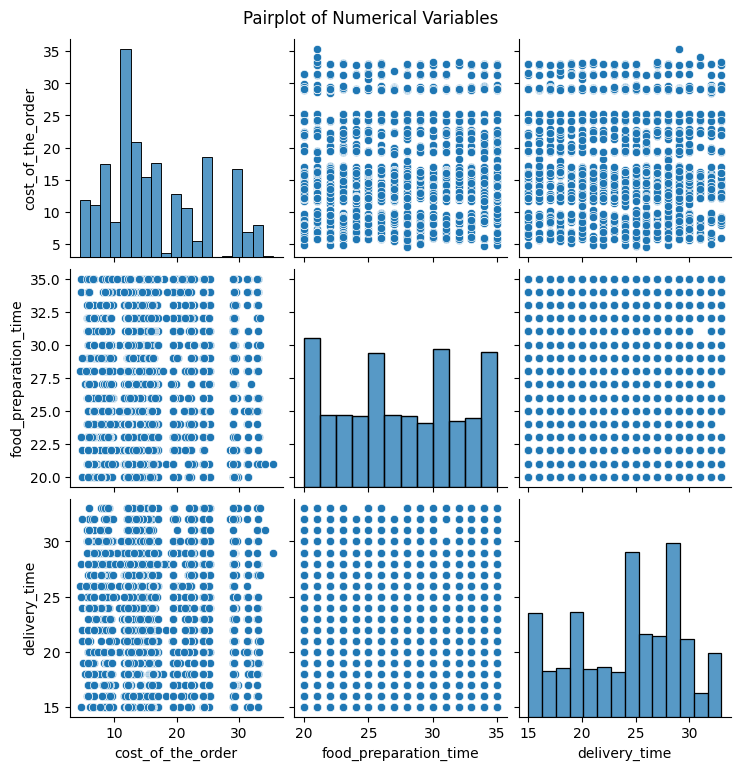

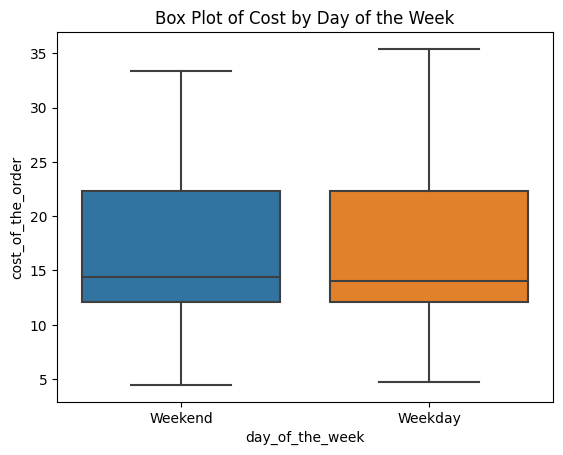

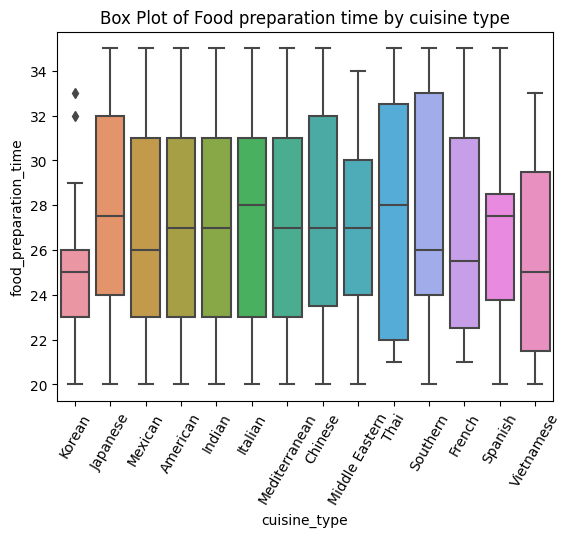

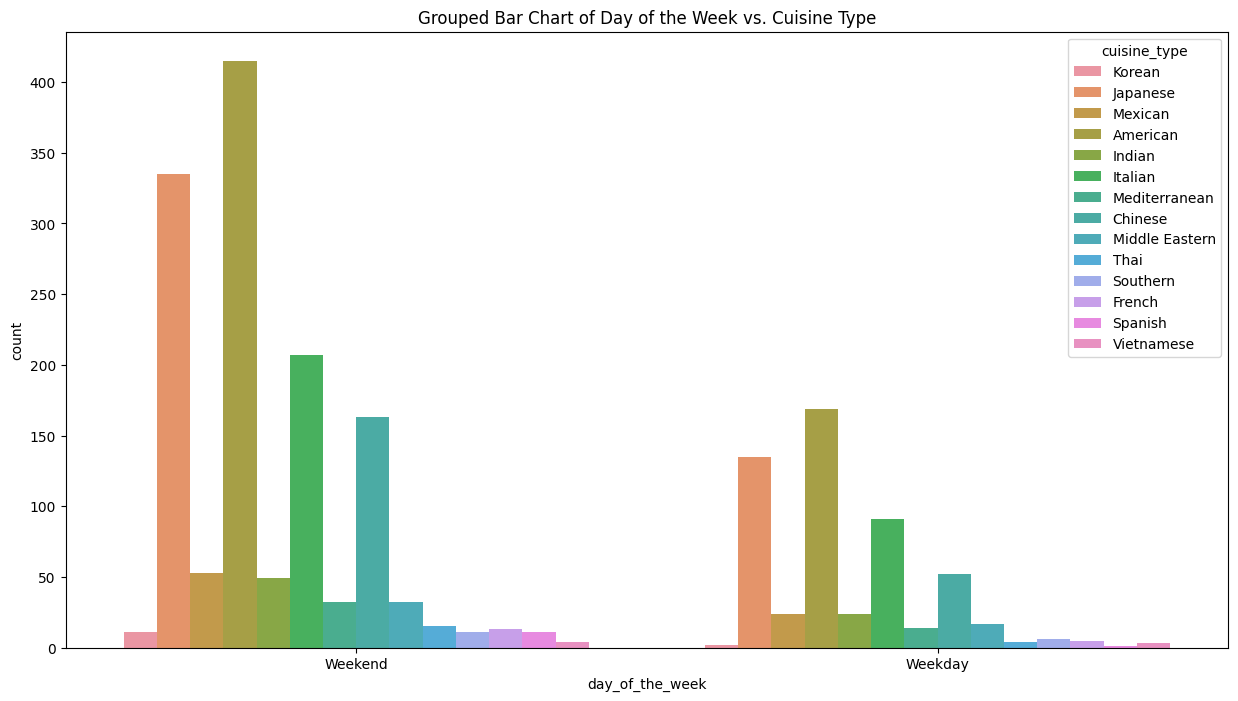

In [ ]:
#Using pairplot to explore relationships between numerical variables
plt.figure(figsize=(15,8))
pairplot = sns.pairplot(df[['cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time']])
pairplot.fig.suptitle("Pairplot of Numerical Variables", y=1.02)
plt.show()

#Boxplots for categorical vs numerical variables
sns.boxplot(data=df, x='day_of_the_week', y='cost_of_the_order')
plt.title("Box Plot of Cost by Day of the Week")
plt.show()

sns.boxplot(data=df,x='cuisine_type', y='food_preparation_time')
plt.title("Box Plot of Food preparation time by cuisine type")
plt.xticks(rotation=60)
plt.show()

# Grouped bar chart for categorical vs categorical variables
plt.figure(figsize=(15,8))
plt.title("Grouped Bar Chart of Day of the Week vs. Cuisine Type")
sns.countplot(data=df, x='day_of_the_week', hue='cuisine_type')
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [ ]:
#Change the string values in rating("not given") to numeric and create a DataFrame grouping by restaurent name aggregating rating count and mean.
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
restaurant_stats = df.groupby('restaurant_name').agg({'rating': ['count', 'mean']}).reset_index()

# Filter restaurants that meet the criteria
filtered_restaurants = restaurant_stats[(restaurant_stats[('rating', 'count')] > 50) & (restaurant_stats[('rating', 'mean')] > 4)]

# Display the restaurants that fulfill the criteria for the promotional offer
print("Restaurants fulfilling the criteria for the promotional offer:")
print(filtered_restaurants['restaurant_name'])

Restaurants fulfilling the criteria for the promotional offer:
20     Blue Ribbon Fried Chicken
21             Blue Ribbon Sushi
136                  Shake Shack
153            The Meatball Shop
Name: restaurant_name, dtype: object


#### Observations:

Filtering the DF by the condition as in restaurants must have a rating count of more than 50 and the average rating should be greater than 4.As observed:
#####The restaurants fulfilling the criteria are Blue Ribbon Freid Chicken,Blue Ribbon Sushi,Shake Shack and The Meatball Shop

It shows these are the restaurants from which customers place orders frequently.These restaurants increase the revenue and worth of the company as they are prefered by a large number of customers and are given good rating,that attract other customers too


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [ ]:
# Calculate the revenue generated for each order based on the cost
def calculate_revenue(cost_of_the_order):
    if cost_of_the_order > 20:
        return cost_of_the_order * 0.25  # 25% charge for orders > $20
    elif cost_of_the_order > 5:
        return cost_of_the_order * 0.15  # 15% charge for orders > $5
    else:
        return 0  # No charge for orders <= $5

# Apply the calculate_revenue function to each row in the DataFrame
df['revenue'] = df['cost_of_the_order'].apply(calculate_revenue)

# Calculate the net revenue by summing the revenue generated across all orders
net_revenue = df['revenue'].sum()

# Display the net revenue
print("Net Revenue Generated by the Company:", net_revenue)

Net Revenue Generated by the Company: 6166.303


#### Observations:
The net revenue generated by the company is 6166.303.This result takes into account the different percentage charges applied to orders with different costs.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [ ]:
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Calculate the percentage of orders that take more than 60 minutes
percentage_above_60_minutes = (df['total_time'] > 60).mean() * 100

# Display the percentage of orders that take more than 60 minutes
print(f"Percentage of orders taking more than 60 minutes: {percentage_above_60_minutes:.2f}%")


Percentage of orders taking more than 60 minutes: 10.54%


#### Observations:
Calculating the total time taken for food preparation and estimating the percentage of orders that take more than 60 mins for the food to be prepared it can be considered that a notable fraction of customers may have to wait longer for their orders to be delivered.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# Group the data by 'day_of_the_week' and calculate the mean delivery time for each group
mean_delivery_time_by_day = df.groupby('day_of_the_week')['delivery_time'].mean()
mean_delivery_time_by_day.index = ['Weekday', 'Weekend']

# Display the mean delivery time for weekdays and weekends
print("Mean delivery time variaiton during weekdays and weekends:")
print(mean_delivery_time_by_day)

Mean delivery time variaiton during weekdays and weekends:
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


#### Observations:
Calculating the mean variation (5.87), we can understand that the mean delivery time is shorter on weekends compared to weekdays. This variation in delivery times could be due to differences in order volumes, traffic conditions, or operational factors during the week and on weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
About DataFrame:
The DataFrame has 9 columns and 1898 rows/entries.Data in each row corresponds to the order placed by a customer.The dataset doesn't not contain any null value or missing values,hence there is no need to handle the missing value.

*  Delivery Time Variation: There is a noticeable difference in mean delivery times between weekdays and weekends. Orders placed during weekends have a shorter mean delivery time compared to weekdays.

* Customer Feedback Ratings: The dataset includes customer feedback ratings for orders. Ratings can be a valuable indicator of customer satisfaction with both restaurants and the delivery service.

* Cuisine Type: The dataset includes information about the cuisine type ordered by customers, which can provide insights into the popularity of different cuisines among customers.

* Cost Analysis: The dataset includes information about the cost of orders. Analyzing cost data can help the company understand pricing trends and customer spending habits.

### Recommendations:

*  Optimize Weekday Delivery.

*  Promote Popular Cuisines: Identify the most popular cuisine types based on order frequency and customer ratings. The company can focus on promoting these popular cuisines to attract more customers.

*  Feedback Mechanism: Implement a feedback mechanism that allows customers to provide comments and ratings for individual dishes. This will help restaurants identify areas for improvement in their menu offerings.

*  Discounts and Promotions: Offer discounts and promotions to customers who consistently order from highly-rated restaurants. This can incentivize customers to explore new restaurants and improve customer retention.

*  Customer Segmentation: Segment customers based on their preferences and ordering habits. Tailor marketing and promotions to different customer segments to maximize engagement and loyalty.



-------